# Table of Contents
1. [Introduction](#introduction)
2. [Installation of Required Libraries](#installation)
3. [Importing Necessary Libraries](#importing)
4. [Loading the Dataset](#loading)
5. [Data Exploration](#exploration)
6. [Data Cleaning](#cleaning)
7. [Sentiment Mapping](#mapping)
8. [Visualization of Sentiment Distribution](#visualization)
9. [Machine Learning Model](#model)


# Introduction <a id='introduction'></a>

**Author:** Ayman Negm  

This notebook performs **emotion analysis** on a dataset of tweets. It covers:

- Data loading
- Cleaning and preprocessing
- Sentiment mapping
- Visualization
- Building a Machine Learning model


## Installation of Required Libraries <a id='installation'></a>

In [3]:
!pip install wordcloud

## Importing Necessary Libraries <a id='importing'></a>

In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

## Loading the Dataset <a id='loading'></a>

In [5]:
# 2. Load dataset
df = pd.read_csv('tweets_dataset.csv', encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

## Data Exploration <a id='exploration'></a>

In [7]:
# 3. Quick exploration
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample data:\n", df.head())

Dataset Shape: (1600000, 6)

Missing values:
 target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

Sample data:
    target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


## Data Cleaning <a id='cleaning'></a>

In [9]:
# 4. Data cleaning
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [10]:
df.clean_text

0             a thats a bummer  you shoulda got david car...
1          is upset that he cant update his facebook by t...
2           i dived many times for the ball managed to sa...
3            my whole body feels itchy and like its on fire 
4           no its not behaving at all im mad why am i he...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999                             happy charitytuesday    
Name: clean_text, Length: 1600000, dtype: object

In [13]:
# 5. Sentiment Mapping
df['sentiment'] = df['target'].apply(lambda x: 'positive' if x == 4 else 'negative')


In [21]:
df

,target,ids,date,flag,user,text,clean_text,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...,negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,negative
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,negative
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,positive
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt intervie...,positive
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...,positive
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,positive


In [15]:
# 6. Sentiment Counts
sentiment_counts = df['sentiment'].value_counts()
print("\nNumber of tweets per sentiment:\n", sentiment_counts)



Number of tweets per sentiment:
 sentiment
negative    800000
positive    800000
Name: count, dtype: int64


## Sentiment Mapping <a id='mapping'></a>

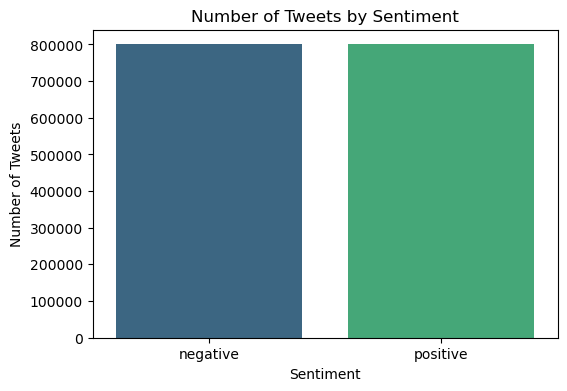

In [35]:
# 7. Bar Plot for Sentiment Distribution
plt.figure(figsize=(6,4))
sns.barplot( x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', legend=False )
plt.title('Number of Tweets by Sentiment')
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment')
plt.show()

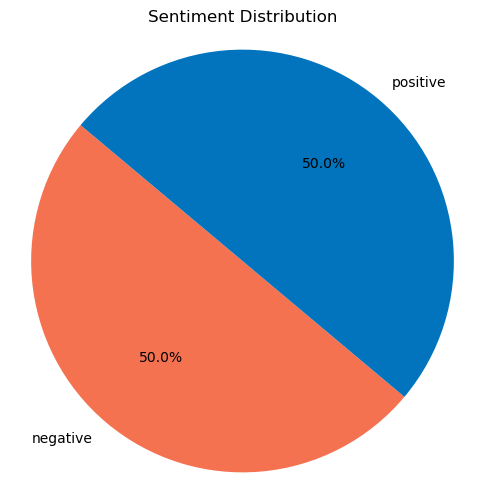

In [49]:
# 8. Pie Chart for Sentiment Percentage
plt.figure(figsize=(6,6))
colors = ['#F57251','#0274BD']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


In [51]:
# 9. WordCloud for Positive Tweets
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

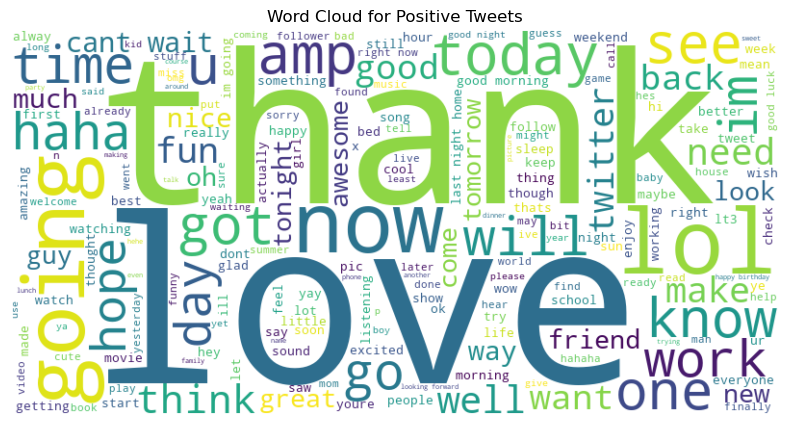

In [53]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

In [55]:
# 10. WordCloud for Negative Tweets
negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

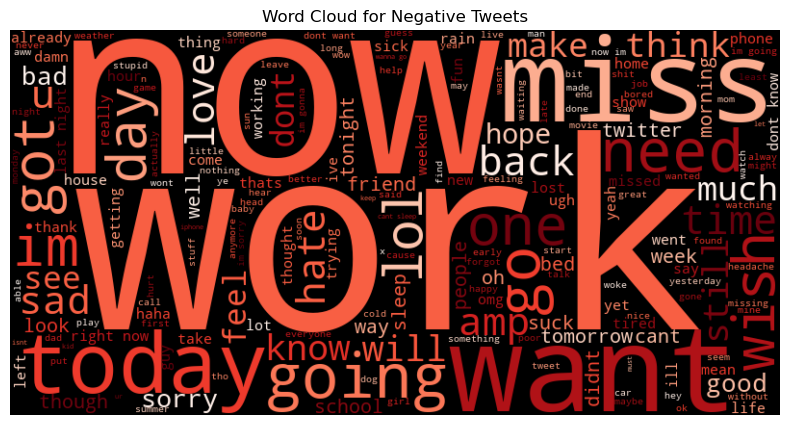

In [57]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

In [109]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['clean_text'].apply(get_polarity)


## Visualization of Sentiment Distribution <a id='visualization'></a>

In [111]:
def polarity_to_emotion(polarity):
    if polarity > 0.3:
        return 'joy'
    elif polarity < -0.3:
        return np.random.choice(['sadness', 'anger', 'fear'])
    else:
        return np.random.choice(['neutral', 'anticipation'])

df['emotion'] = df['polarity'].apply(polarity_to_emotion)


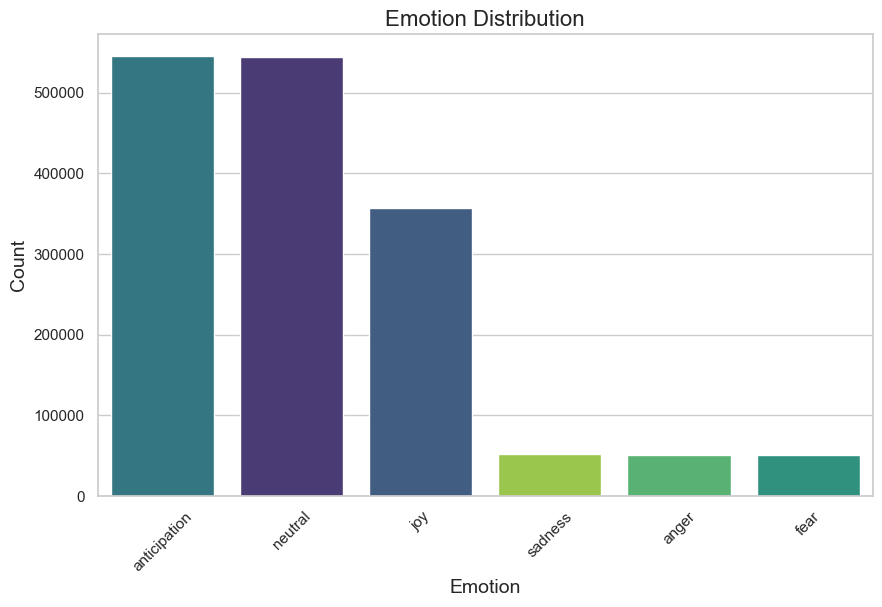

In [119]:
plt.figure(figsize=(10,6))
sns.countplot(x='emotion', hue='emotion', data=df, order=df['emotion'].value_counts().index, palette='viridis', legend=False)
plt.title('Emotion Distribution', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()



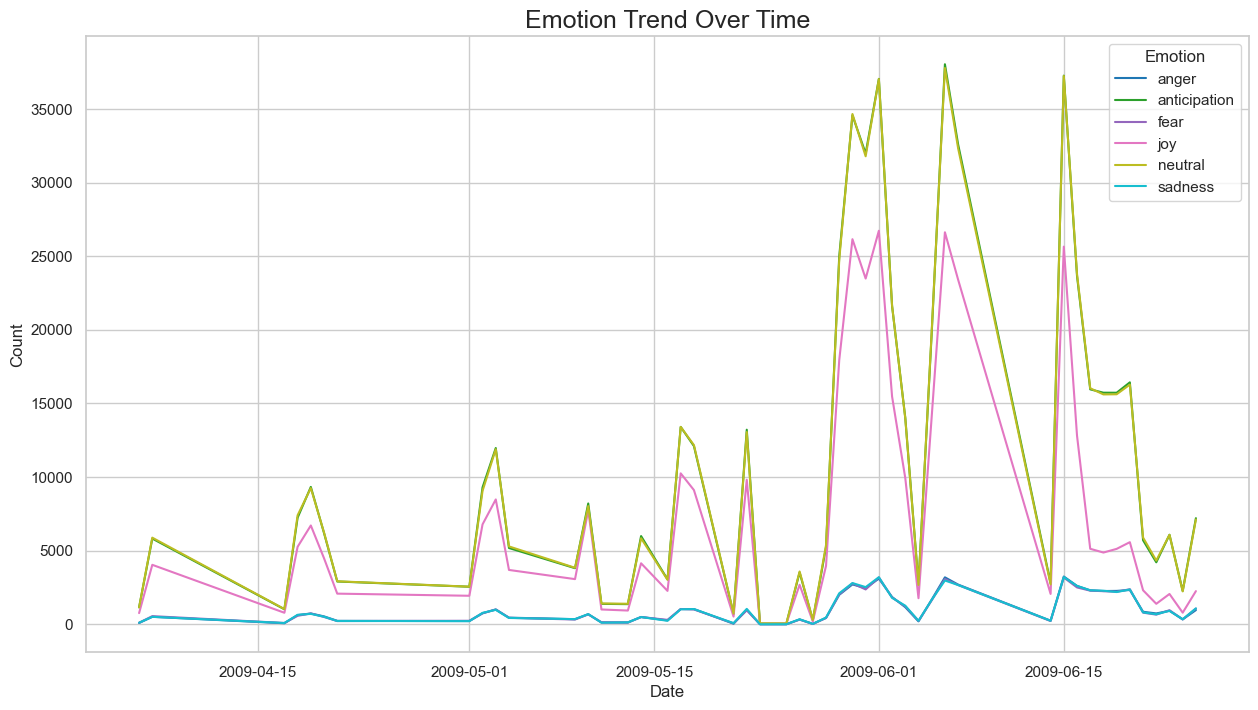

In [125]:
# Step 1: Convert date to string first (if it's not already)
df['date'] = df['date'].astype(str)

# Step 2: Remove timezone words like PDT, EDT, etc.
df['date'] = df['date'].str.replace(r'\s+[A-Z]{2,4}\s+', ' ', regex=True)

# Step 3: Now safely parse to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date and emotion
trend = df.groupby([df['date'].dt.date, 'emotion']).size().unstack(fill_value=0)

# Plot
trend.plot(figsize=(15,8), colormap='tab10')
plt.title('Emotion Trend Over Time', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.show()


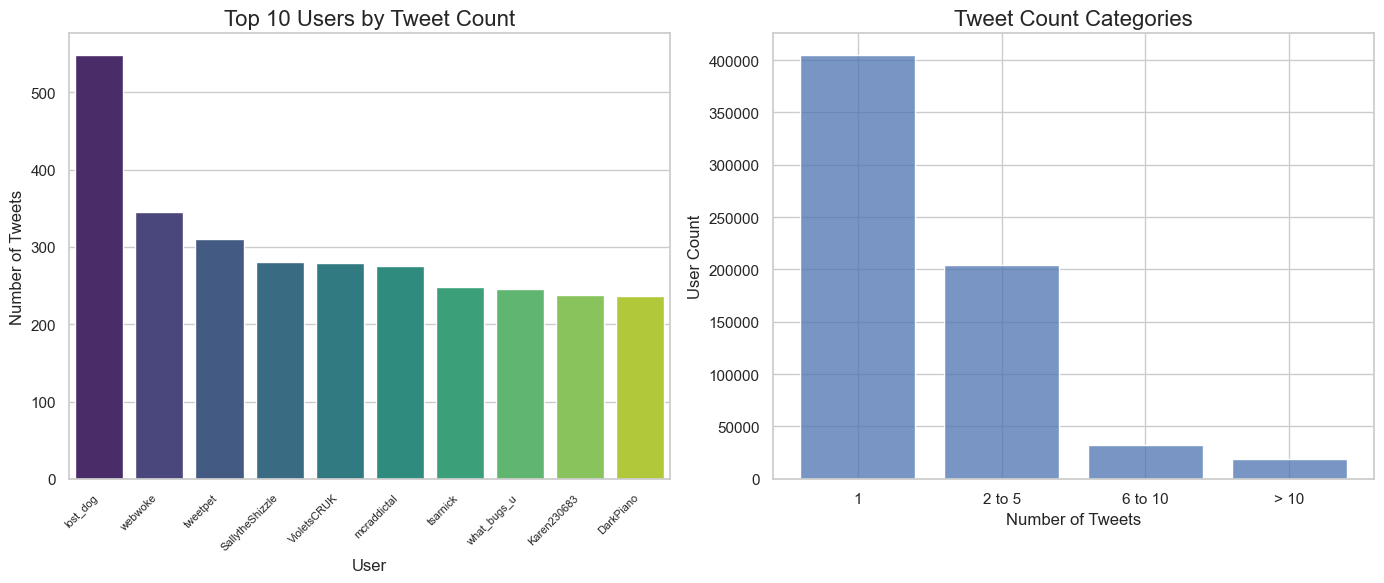

In [133]:
# Count tweets per user
tweet_user_count = df['user'].value_counts().reset_index()
tweet_user_count.columns = ['user', 'count']

# Top 10 tweeters
top_10_tweeters = tweet_user_count.sort_values(by='count', ascending=False).head(10)

# Categorize number of tweets
tweet_user_count['number of tweets'] = pd.cut(tweet_user_count['count'],
                                              bins=[0, 1, 5, 10, 1000],
                                              labels=['1', '2 to 5', '6 to 10', '> 10'])

# Create the plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

# Plot 1: Top 10 tweeters
sns.barplot(data=top_10_tweeters, x='user', y='count', hue='user', palette='viridis', dodge=False, ax=ax1, legend=False)
ax1.set_xticks(range(len(top_10_tweeters)))
ax1.set_xticklabels(top_10_tweeters['user'], rotation=45, ha='right', fontsize=8)
ax1.set_title('Top 10 Users by Tweet Count', fontsize=16)
ax1.set_xlabel('User', fontsize=12)
ax1.set_ylabel('Number of Tweets', fontsize=12)

# Plot 2: Histogram of number of tweets per user
sns.histplot(data=tweet_user_count, x='number of tweets', discrete=True, shrink=0.8, ax=ax2)
ax2.set_title('Tweet Count Categories', fontsize=16)
ax2.set_xlabel('Number of Tweets', fontsize=12)
ax2.set_ylabel('User Count', fontsize=12)

plt.tight_layout()
plt.show()


## Machine Learning Model <a id='model'></a>

In [19]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1120000,), (480000,), (1120000,), (480000,))

In [21]:
featurizer = TfidfVectorizer()

X_train2 = featurizer.fit_transform(X_train)
X_test2  = featurizer.transform(X_test)

In [23]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='macro')
    recall    = recall_score(y_test_data,preds,average='macro')
    f1        = f1_score(y_test_data,preds,average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table 

In [25]:
MNB = MultinomialNB()
MNB.fit(X_train2, y_train)

MNB_train_preds   = MNB.predict(X_train2)
MNB_train_results = get_test_scores('MNB (train)', MNB_train_preds, y_train)

MNB_test_preds   = MNB.predict(X_test2)
MNB_test_results = get_test_scores('MNB (test)', MNB_test_preds, y_test)

MNB_results = pd.concat([MNB_train_results,MNB_test_results], axis=0)
MNB_results

,model,precision,recall,F1,accuracy
0,MNB (train),0.842009,0.839705,0.839474,0.839752
0,MNB (test),0.775310,0.772743,0.772110,0.772613


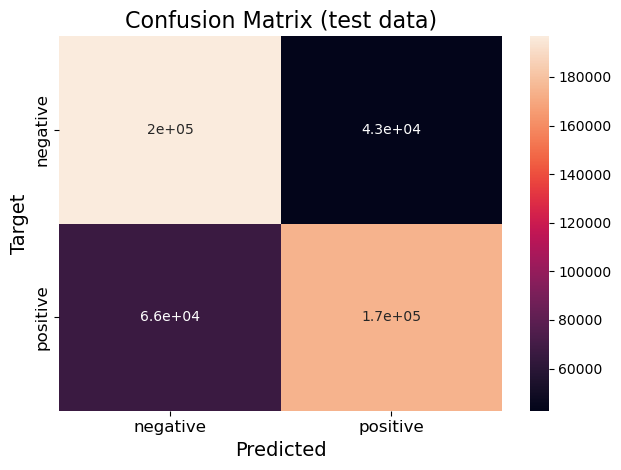

In [27]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, MNB_test_preds, labels=MNB.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix (test data)', fontsize=16)
ax.xaxis.set_ticklabels(['negative','positive'], fontsize=12) 
ax.yaxis.set_ticklabels(['negative','positive'], fontsize=12) 
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Target", fontsize=14)

plt.tight_layout()